In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Name,New Code,GCSE_Score,Density,Eng_HH,Lone_Parent,House_Price,Income,Qual_Level4,Out_Work_Fam,Absence,Crime,Bad_Health,Happiness,Green_Space,PTAL,Cars_HH,Deprivation
0,City of London,E09000001,354.500000,2312.500000,3862,153,765000.0,99390.0,68.4,9.500000,0.700000,680.720631,3.4,7.640332,18.629014,7.900000,0.385861,12.124906
1,Abbey,E05000026,317.657759,9884.615385,3397,648,173000.0,38870.0,34.5,22.077922,1.356022,142.212846,4.3,7.897959,21.908601,5.989365,0.547682,32.726127
2,Alibon,E05000027,307.445732,7464.285714,3656,832,215000.0,37290.0,16.7,24.714286,1.489166,75.689606,6.7,7.358842,20.621849,3.145890,0.815160,36.066225
3,Becontree,E05000028,295.451381,8923.076923,3826,880,210000.0,37860.0,20.6,22.023810,1.465376,79.325731,7.0,7.609123,1.885448,2.871767,0.870236,31.686544
4,Chadwell Heath,E05000029,293.437838,2970.588235,3685,776,240500.0,38860.0,19.5,24.333333,1.604042,72.407045,6.8,7.108108,55.974507,2.260909,0.918062,38.044504


In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 读取数据
data = pd.read_csv('cleaned_data.csv')

# 定义自变量矩阵 X
X = data[['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 'Income', 
          'Qual_Level4', 'Out_Work_Fam', 'Absence', 'Crime', 
          'Bad_Health', 'Happiness', 'Green_Space', 'PTAL', 
          'Cars_HH', 'Deprivation']]

# 添加常数项到自变量矩阵中（这是 statsmodels 需要的）
X = sm.add_constant(X)

# 计算 VIF
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 显示 VIF 结果
print(vif)


        Variable          VIF
0          const  1266.344816
1        Density     5.040872
2         Eng_HH     2.511505
3    Lone_Parent     5.637229
4    House_Price     7.929615
5         Income    11.460389
6    Qual_Level4     5.187479
7   Out_Work_Fam     6.676327
8        Absence     2.114778
9          Crime     1.681375
10    Bad_Health     4.221812
11     Happiness     1.139248
12   Green_Space     2.248394
13          PTAL     5.439133
14       Cars_HH    13.085537
15   Deprivation     8.834048


In [5]:
import pandas as pd
import statsmodels.api as sm

# 读取数据
data = pd.read_csv('cleaned_data.csv')

# 定义因变量 Y 和自变量矩阵 X
Y = data['GCSE_Score']
X = data[['Density', 'Eng_HH', 'Lone_Parent', 'House_Price',
          'Qual_Level4', 'Out_Work_Fam', 'Absence', 'Crime', 
          'Bad_Health', 'Happiness', 'Green_Space', 'PTAL', 
           'Deprivation']]

# 在自变量矩阵 X 中添加常数项
X = sm.add_constant(X)

# 构建OLS回归模型
model = sm.OLS(Y, X)

# 拟合模型
results = model.fit()

# 输出回归结果
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:             GCSE_Score   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     78.25
Date:                Thu, 22 Aug 2024   Prob (F-statistic):          1.16e-120
Time:                        06:17:01   Log-Likelihood:                -2499.3
No. Observations:                 625   AIC:                             5027.
Df Residuals:                     611   BIC:                             5089.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          336.7818     14.783     22.781   

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 读取数据
data = pd.read_csv('cleaned_data.csv')

# 定义自变量和因变量
X = data[['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
          'Income', 'Qual_Level4', 'Out_Work_Fam', 'Absence', 'Crime', 
          'Bad_Health', 'Happiness', 'Green_Space', 'PTAL', 
          'Cars_HH', 'Deprivation']]
y = data['GCSE_Score']

# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
# 创建随机森林回归模型
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = rf.predict(X_test)


In [29]:
# 计算均方误差（MSE）
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 输出特征重要性
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
print(feature_importances.sort_values(by='Importance', ascending=False))


Mean Squared Error: 187.38246002983493
         Feature  Importance
6   Out_Work_Fam    0.591702
14   Deprivation    0.052733
4         Income    0.049198
7        Absence    0.049193
5    Qual_Level4    0.042745
3    House_Price    0.029856
0        Density    0.027600
2    Lone_Parent    0.022722
1         Eng_HH    0.022587
11   Green_Space    0.021676
9     Bad_Health    0.019907
8          Crime    0.019079
10     Happiness    0.018900
12          PTAL    0.016319
13       Cars_HH    0.015783


In [30]:
from sklearn.metrics import r2_score

# 计算 R^2
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


R-squared: 0.5901534246144726


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split



/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


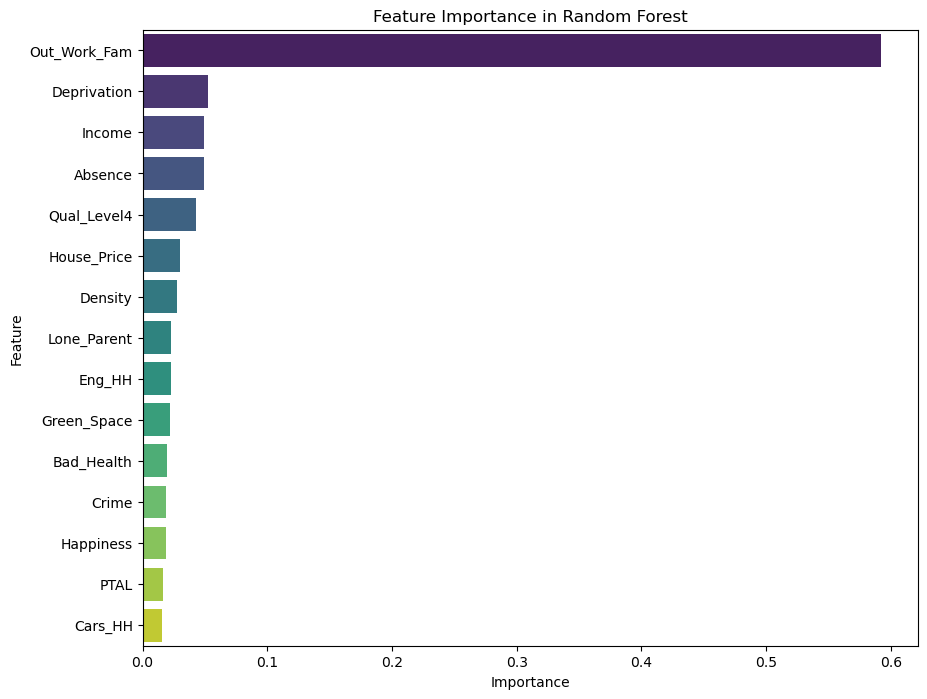

In [32]:
# 提取特征重要性
importances = rf.feature_importances_
feature_names = X.columns

# 创建 DataFrame 用于存储特征重要性
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 按重要性排序
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 绘制特征重要性排序图
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


                                  Category  Importance
0                        Family Background    0.663623
1                   Educational Background    0.065332
2         Community and Living Environment    0.129267
3                    Health and Well-being    0.038807
4                     School Participation    0.049193
5  Urban Infrastructure and Transportation    0.053779


/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


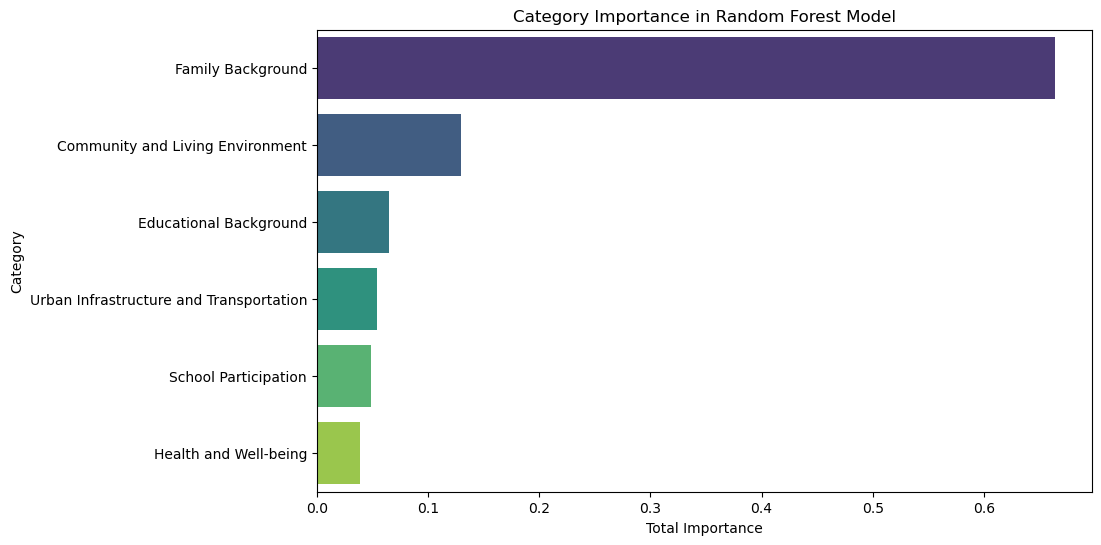

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 从已训练的随机森林模型中获取特征重要性
importances = rf.feature_importances_
feature_names = X.columns

# 定义每个大类的变量
categories = {
    'Family Background': ['Income', 'Lone_Parent', 'Out_Work_Fam'],
    'Educational Background': ['Qual_Level4', 'Eng_HH'],
    'Community and Living Environment': ['House_Price', 'Deprivation', 'Density', 'Crime'],
    'Health and Well-being': ['Bad_Health', 'Happiness'],
    'School Participation': ['Absence'],
    'Urban Infrastructure and Transportation': ['PTAL', 'Green_Space', 'Cars_HH']
}

# 创建一个空的字典来存储每个大类的总重要性
category_importance = {}

# 计算每个大类的总重要性
for category, vars in categories.items():
    # 计算属于该类别的所有特征的重要性总和
    total_importance = sum([importances[feature_names.get_loc(var)] for var in vars if var in feature_names])
    category_importance[category] = total_importance

# 将结果转换为DataFrame以便于查看
category_importance_df = pd.DataFrame(list(category_importance.items()), columns=['Category', 'Importance'])

# 输出大类的重要性数值
print(category_importance_df)

# 按重要性排序
category_importance_df = category_importance_df.sort_values(by='Importance', ascending=False)

# 绘制大类的重要性排序图
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Category', data=category_importance_df, palette='viridis')
plt.title('Category Importance in Random Forest Model')
plt.xlabel('Total Importance')
plt.ylabel('Category')
plt.show()

In [8]:
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 读取地理数据和模型数据
shapefile_path = 'ward/London_Ward.shp'
gdf = gpd.read_file(shapefile_path)
data = pd.read_csv('cleaned_data.csv')

# 定义因变量和自变量
Y = data['GCSE_Score']
X = data[['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
          'Qual_Level4', 'Out_Work_Fam', 'Absence', 'Crime', 
          'Bad_Health', 'Happiness', 'Green_Space', 'PTAL', 
          'Deprivation']]

# 添加常数项并拟合模型
X = sm.add_constant(X)
model = sm.OLS(Y, X)
results = model.fit()

# 提取残差
data['residuals'] = results.resid

# 将残差合并到地理数据中
merged_gdf = gdf.merge(data, left_on='GSS_CODE', right_on='New Code')


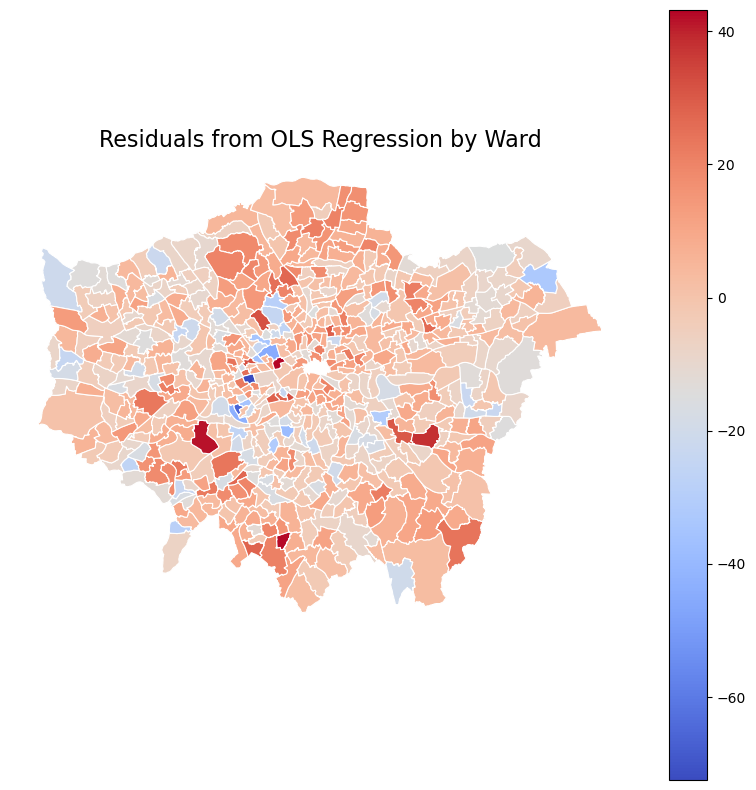

In [15]:
# 绘制残差在地图中的分布
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='residuals', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='white', legend=True)

# 添加标题
ax.set_title('Residuals from OLS Regression by Ward', fontsize=16)

# 移除坐标轴
ax.axis('off')
# 显示地图
plt.show()

In [19]:
import geopandas as gpd
import esda
from libpysal.weights import Queen
import matplotlib.pyplot as plt

# 读取 Shapefile 文件
shapefile_path = 'ward/London_Ward.shp'
gdf = gpd.read_file(shapefile_path)

# 合并地理数据与残差数据
merged_gdf = gdf.merge(data, left_on='GSS_CODE', right_on='New Code')

# 计算邻接权重矩阵
w = Queen.from_dataframe(merged_gdf)

# 计算 Moran's I 指数
moran = esda.Moran(merged_gdf['residuals'], w)

# 输出 Moran's I 结果
print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")

/tmp/ipykernel_23005/678159474.py:14: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(merged_gdf)


Moran's I: 0.1763563472218113
p-value: 0.001


In [32]:
pip install pysal


  Obtaining dependency information for numpy>=1.3 from https://files.pythonhosted.org/packages/22/97/dfb1a31bb46686f09e68ea6ac5c63fdee0d22d7b23b8f3f7ea07712869ef/numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 10.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade pysal


  Obtaining dependency information for pysal from https://files.pythonhosted.org/packages/d8/53/5597ffb9c9847b4e468d584445ad44cea1633429f01d20cc5f481e8d048a/pysal-24.7-py3-none-any.whl.metadata
  Obtaining dependency information for access>=1.1.9 from https://files.pythonhosted.org/packages/5d/e0/be59a75ad3d0b0fea7f8c6c55439772c4bb791406f3653aa25880ec68d7f/access-1.1.9-py3-none-any.whl.metadata
  Obtaining dependency information for giddy>=2.3.5 from https://files.pythonhosted.org/packages/a2/19/9125c0ec03be4e4345b95c8a8490d4552fb224cb86ed27e0ef2d37d09e06/giddy-2.3.5-py3-none-any.whl.metadata
  Obtaining dependency information for inequality>=1.0.1 from https://files.pythonhosted.org/packages/29/70/01825bb1140513493cc0a12e1c736f80006a097ac20661ca87382f3e36a4/inequality-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pointpats>=2.5.0 from https://files.pythonhosted.org/packages/c6/c1/e31675f64ea2feca24a10b9b6ec5ede000e53a6d92787da8329e2fd523a9/pointpats-2.5.0-py3-

In [1]:
import numpy as np  
import geopandas as gpd
import pandas as pd
import pysal.lib as lib
import pysal.model.spreg as spreg

# 读取地理数据和模型数据
shapefile_path = 'ward/London_ward.shp'
gdf = gpd.read_file(shapefile_path)
data = pd.read_csv('cleaned_data.csv')

# 确保地理数据和回归数据的对齐
gdf = gdf.sort_values(by='GSS_CODE')  # 假设地理数据中有一个唯一标识符 'GSS_CODE'
data = data.sort_values(by='New Code')  # 假设经济数据中有一个相同的唯一标识符 'New Code'

# 合并数据，确保地理数据和回归数据完全一致
merged_gdf = gdf.merge(data, left_on='GSS_CODE', right_on='New Code')

# 定义因变量和自变量
y = merged_gdf['GCSE_Score'].values
X = merged_gdf[['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
                 'Qual_Level4', 'Out_Work_Fam', 'Absence', 
                'Crime', 'Bad_Health', 'Happiness', 'Green_Space', 
                'PTAL',  'Deprivation']].values

# 构建空间权重矩阵
w = lib.weights.Queen.from_dataframe(merged_gdf)  # 使用Queen邻接空间权重
w.transform = 'r'  # 将权重矩阵标准化

# 估计空间滞后模型（SAR）
model = spreg.ML_Lag(y, X, w=w, name_y='GCSE_Score', name_x=['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
                                                             'Qual_Level4', 'Out_Work_Fam', 'Absence', 
                                                            'Crime', 'Bad_Health', 'Happiness', 'Green_Space', 
                                                            'PTAL',  'Deprivation'])

# 输出结果
print(model.summary)


/tmp/ipykernel_26479/4013687534.py:27: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lib.weights.Queen.from_dataframe(merged_gdf)  # 使用Queen邻接空间权重


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: MAXIMUM LIKELIHOOD SPATIAL LAG (METHOD = FULL)
-----------------------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  GCSE_Score                Number of Observations:         624
Mean dependent var  :    327.2229                Number of Variables   :          15
S.D. dependent var  :     21.5491                Degrees of Freedom    :         609
Pseudo R-squared    :      0.6425
Spatial Pseudo R-squared:  0.6152
Log likelihood      :  -2482.9795
Sigma-square ML     :    165.7628                Akaike info criterion :    4995.959
S.E of regression   :     12.8749                Schwarz criterion     :    5062.501

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
---------------------------------------------------------------

In [7]:
import numpy as np  
import geopandas as gpd
import pandas as pd
import pysal.lib as lib
import pysal.model.spreg as spreg

# 读取地理数据和模型数据
shapefile_path = 'ward/London_ward.shp'
gdf = gpd.read_file(shapefile_path)
data = pd.read_csv('cleaned_data.csv')

# 确保地理数据和回归数据的对齐
gdf = gdf.sort_values(by='GSS_CODE')  # 假设地理数据中有一个唯一标识符 'GSS_CODE'
data = data.sort_values(by='New Code')  # 假设经济数据中有一个相同的唯一标识符 'New Code'

# 合并数据，确保地理数据和回归数据完全一致
merged_gdf = gdf.merge(data, left_on='GSS_CODE', right_on='New Code')

# 定义因变量和自变量
y = merged_gdf['GCSE_Score'].values
X = merged_gdf[['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
                 'Qual_Level4', 'Out_Work_Fam', 'Absence', 
                'Crime', 'Bad_Health', 'Happiness', 'Green_Space', 
                'PTAL',  'Deprivation']].values

# 构建空间权重矩阵（使用合并后的数据）
w = lib.weights.Queen.from_dataframe(merged_gdf)  # 使用Queen邻接空间权重
w.transform = 'r'  # 将权重矩阵标准化

# 估计空间误差模型（SEM）
model = spreg.ML_Error(y, X, w=w, name_y='GCSE_Score', name_x=['Density', 'Eng_HH', 'Lone_Parent', 'House_Price', 
                                                               'Qual_Level4', 'Out_Work_Fam', 'Absence', 
                                                              'Crime', 'Bad_Health', 'Happiness', 'Green_Space', 
                                                              'PTAL',  'Deprivation'])

# 输出结果
print(model.summary)


/tmp/ipykernel_26479/160258086.py:27: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = lib.weights.Queen.from_dataframe(merged_gdf)  # 使用Queen邻接空间权重
/opt/conda/lib/python3.11/site-packages/scipy/optimize/_minimize.py:913: RuntimeWarning: Method 'bounded' does not support relative tolerance in x; defaulting to absolute tolerance.
  warn("Method 'bounded' does not support relative tolerance in x; "


REGRESSION RESULTS
------------------

SUMMARY OF OUTPUT: ML SPATIAL ERROR (METHOD = full)
---------------------------------------------------
Data set            :     unknown
Weights matrix      :     unknown
Dependent Variable  :  GCSE_Score                Number of Observations:         624
Mean dependent var  :    327.2229                Number of Variables   :          14
S.D. dependent var  :     21.5491                Degrees of Freedom    :         610
Pseudo R-squared    :      0.6222
Log likelihood      :  -2473.2014
Sigma-square ML     :    157.7431                Akaike info criterion :    4974.403
S.E of regression   :     12.5596                Schwarz criterion     :    5036.509

------------------------------------------------------------------------------------
            Variable     Coefficient       Std.Error     z-Statistic     Probability
------------------------------------------------------------------------------------
            CONSTANT       331.60503    

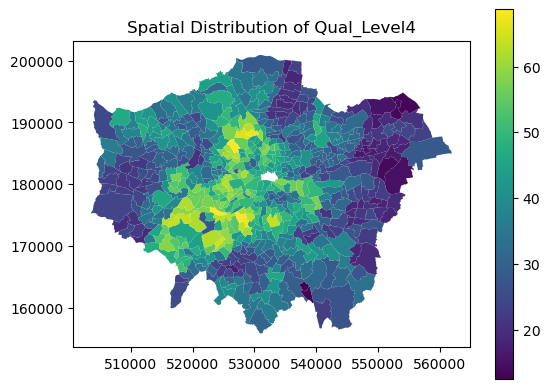

In [16]:
# 绘制显著变量的空间分布图
merged_gdf.plot(column='Qual_Level4', cmap='viridis', legend=True)
plt.title('Spatial Distribution of Qual_Level4')
plt.show()

